<a href="https://colab.research.google.com/github/olivem20/EmployeeProductivityPrediction/blob/main/EmployeeProductivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'm asking the question, what qualities make our employees successful and allows them to be efficient and productive? I also want to take a look specifically for the engineers category, what makes the best engineer for a company? Could also maybe look at the best qualities for males vs. females

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Extended_Employee_Performance_and_Productivity_Data.csv')
x = data.drop(columns=['Hire_Date', 'Employee_ID', 'Resigned'], axis=1)
x.head()

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,IT,Male,55,Specialist,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,Finance,Male,29,Developer,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,Finance,Male,55,Specialist,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25


In [ ]:
from sklearn.preprocessing import LabelEncoder

#label encode Education_Level and Gender
label_encoder = LabelEncoder()

x['Gender'] = x['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
x['Education_Level'] = x['Education_Level'].map({'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3})

x.head()

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,IT,0,55,Specialist,2,0,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,Finance,0,29,Developer,0,0,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,Finance,0,55,Specialist,8,0,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,Customer Support,1,48,Analyst,7,1,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,Engineering,1,36,Analyst,3,1,2,4800.0,38,11,29,13,100,15,9,1,1.25


In [ ]:
#Now we want to one hot encode deartment and job title
one_hot_encoded = pd.get_dummies(x, columns=['Department', 'Job_Title'], prefix={'Department': 'Department', 'Job_Title' : 'Title'})

columns_to_convert = ['Department_Customer Support', 'Department_Engineering',
       'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Legal', 'Department_Marketing', 'Department_Operations',
       'Department_Sales', 'Title_Analyst', 'Title_Consultant',
       'Title_Developer', 'Title_Engineer', 'Title_Manager',
       'Title_Specialist', 'Title_Technician']
one_hot_encoded[columns_to_convert] = one_hot_encoded[columns_to_convert].astype(int)

one_hot_encoded.head()

,Gender,Age,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,...,Department_Marketing,Department_Operations,Department_Sales,Title_Analyst,Title_Consultant,Title_Developer,Title_Engineer,Title_Manager,Title_Specialist,Title_Technician
0,0,55,2,0,5,6750.0,33,32,22,2,...,0,0,0,0,0,0,0,0,1,0
1,0,29,0,0,5,7500.0,34,34,13,14,...,0,0,0,0,0,1,0,0,0,0
2,0,55,8,0,3,5850.0,37,27,6,3,...,0,0,0,0,0,0,0,0,1,0
3,1,48,7,1,2,4800.0,52,10,28,12,...,0,0,0,1,0,0,0,0,0,0
4,1,36,3,1,2,4800.0,38,11,29,13,...,0,0,0,1,0,0,0,0,0,0


#First model looks at features outside of one_hot_encoded ones

In [ ]:
X = one_hot_encoded.drop(columns=['Performance_Score', 'Department_Customer Support', 'Department_Engineering',
       'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Legal', 'Department_Marketing', 'Department_Operations',
       'Department_Sales', 'Title_Analyst', 'Title_Consultant',
       'Title_Developer', 'Title_Engineer', 'Title_Manager',
       'Title_Specialist', 'Title_Technician'], axis=1)
y = one_hot_encoded['Performance_Score']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

numerical_features = ['Age', 'Years_At_Company', 'Monthly_Salary', 'Projects_Handled', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Sick_Days', 'Employee_Satisfaction_Score']

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

X_test[numerical_features] = scaler.transform(X_test[numerical_features])

The actual model


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 1.470668479071616
Mean Absolute Error (MAE): 1.0080226929337017
R² Score: 0.26649254610796114


In [ ]:
coefficients = model.coef_
features = X_train.columns

coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

print(coefficients_df.sort_values(by='Coefficient', ascending=False))

                        Feature  Coefficient
4                Monthly_Salary     0.719175
2              Years_At_Company     0.002553
8                     Sick_Days     0.002362
6              Projects_Handled     0.000546
1                           Age     0.000278
11               Training_Hours     0.000214
9         Remote_Work_Frequency     0.000133
13  Employee_Satisfaction_Score     0.000114
7                Overtime_Hours    -0.000546
10                    Team_Size    -0.001642
3               Education_Level    -0.003370
5           Work_Hours_Per_Week    -0.005189
0                        Gender    -0.006746
12                   Promotions    -0.008210


#Second Model goes by Department


In [ ]:
X.columns

Index(['Gender', 'Age', 'Years_At_Company', 'Education_Level',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score'],
      dtype='object')

In [ ]:
X = one_hot_encoded.drop(columns=['Performance_Score', 'Title_Analyst', 'Title_Consultant',
       'Title_Developer', 'Title_Engineer', 'Title_Manager',
       'Title_Specialist', 'Title_Technician'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

numerical_features = ['Age', 'Years_At_Company', 'Monthly_Salary', 'Projects_Handled', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Sick_Days', 'Employee_Satisfaction_Score']

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

X_test[numerical_features] = scaler.transform(X_test[numerical_features])

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 1.4709950899375834
Mean Absolute Error (MAE): 1.0080481249767814
R² Score: 0.266329646373508


In [ ]:
coefficients = model.coef_
features = X_train.columns

coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

print(coefficients_df.sort_values(by='Coefficient', ascending=False))

                        Feature  Coefficient
4                Monthly_Salary     0.719146
21        Department_Operations     0.016197
17                Department_HR     0.010995
14  Department_Customer Support     0.008781
15       Department_Engineering     0.006263
2              Years_At_Company     0.002550
8                     Sick_Days     0.002371
6              Projects_Handled     0.000596
1                           Age     0.000225
11               Training_Hours     0.000215
9         Remote_Work_Frequency     0.000134
13  Employee_Satisfaction_Score     0.000117
7                Overtime_Hours    -0.000587
10                    Team_Size    -0.001640
20         Department_Marketing    -0.002265
3               Education_Level    -0.003414
5           Work_Hours_Per_Week    -0.005177
18                Department_IT    -0.005811
19             Department_Legal    -0.006496
0                        Gender    -0.006646
12                   Promotions    -0.008176
16        

#Third Model by Title

In [ ]:
X = one_hot_encoded.drop(columns=['Performance_Score', 'Department_Customer Support', 'Department_Engineering',
       'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Legal', 'Department_Marketing', 'Department_Operations',
       'Department_Sales'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

numerical_features = ['Age', 'Years_At_Company', 'Monthly_Salary', 'Projects_Handled', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Sick_Days', 'Employee_Satisfaction_Score']

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

X_test[numerical_features] = scaler.transform(X_test[numerical_features])

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.06434015036295901
Mean Absolute Error (MAE): 0.18782870235889101
R² Score: 0.967909844708471


In [ ]:
coefficients = model.coef_
features = X_train.columns

coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

print(coefficients_df.sort_values(by='Coefficient', ascending=False))

                        Feature  Coefficient
20             Title_Technician     3.643889
4                Monthly_Salary     2.695221
14                Title_Analyst     2.370754
19             Title_Specialist     1.095446
7                Overtime_Hours     0.001481
12                   Promotions     0.001151
5           Work_Hours_Per_Week     0.000679
2              Years_At_Company     0.000508
3               Education_Level     0.000373
10                    Team_Size     0.000115
9         Remote_Work_Frequency     0.000021
11               Training_Hours    -0.000033
1                           Age    -0.000269
13  Employee_Satisfaction_Score    -0.000488
0                        Gender    -0.000875
6              Projects_Handled    -0.000894
8                     Sick_Days    -0.001229
16              Title_Developer    -0.182421
15             Title_Consultant    -1.458989
18                Title_Manager    -2.733479
17               Title_Engineer    -2.735199


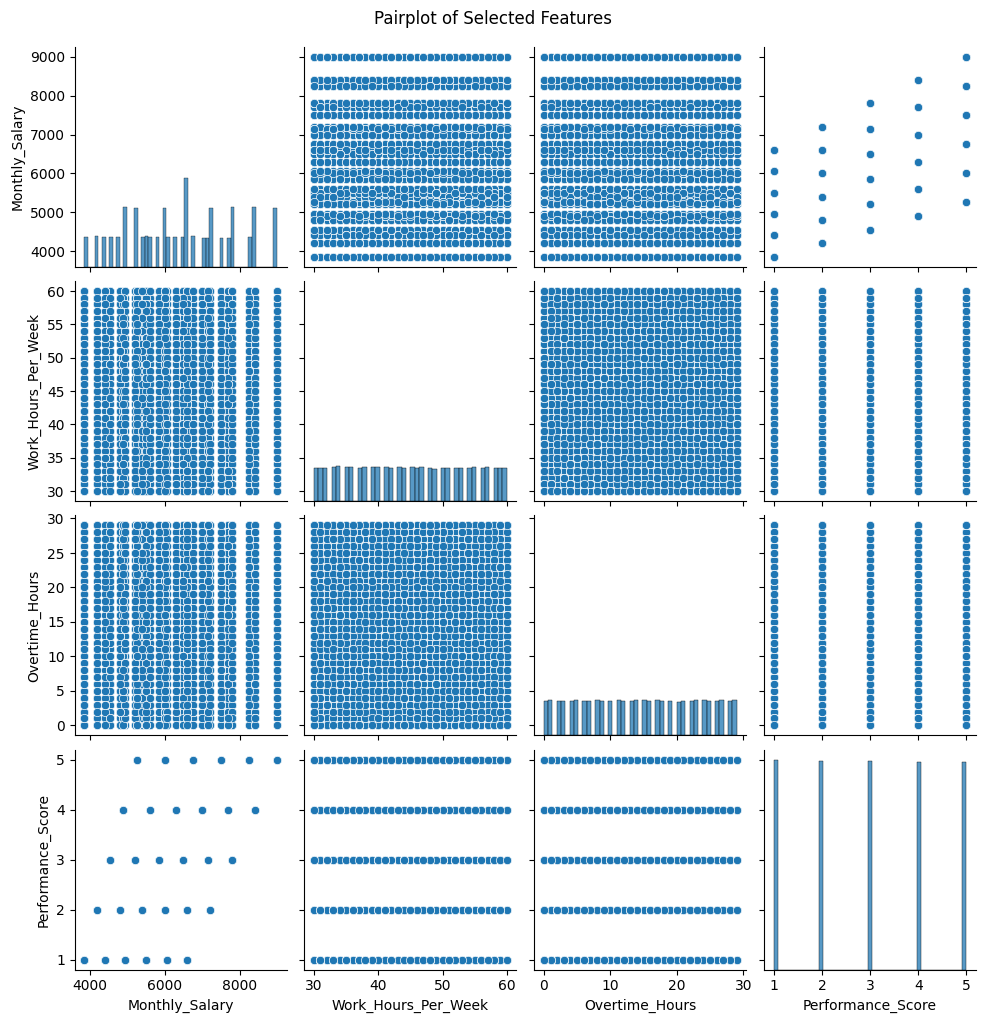

In [ ]:
sns.pairplot(one_hot_encoded, vars=['Monthly_Salary', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Performance_Score'])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

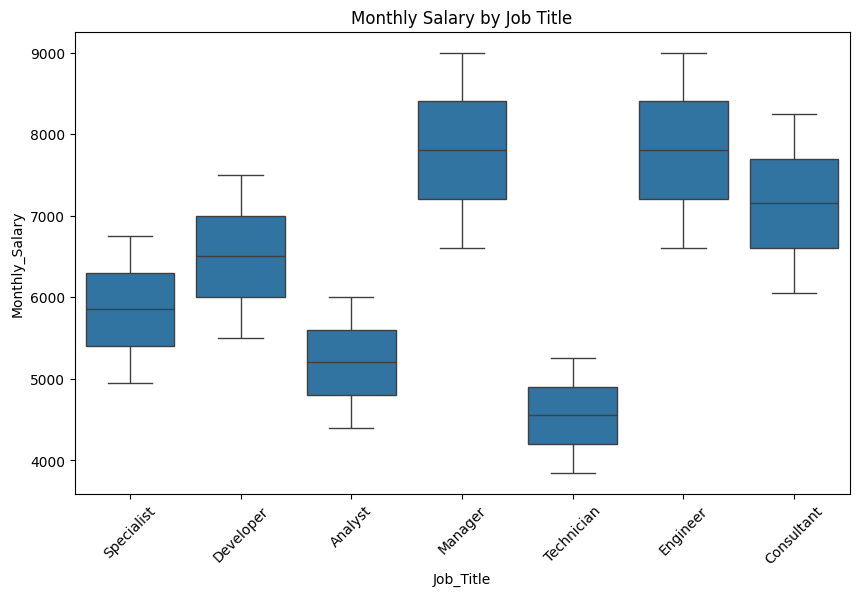

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Title', y='Monthly_Salary', data=data)
plt.title('Monthly Salary by Job Title')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-fbb6635e9662>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job_Title', y='Performance_Score', data=data, palette='coolwarm')


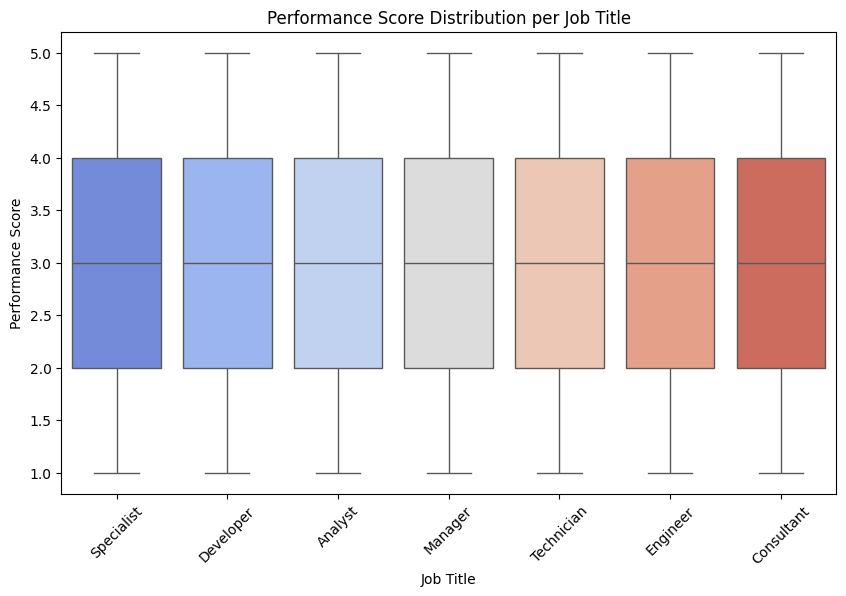

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Title', y='Performance_Score', data=data, palette='coolwarm')

plt.title('Performance Score Distribution per Job Title')
plt.xlabel('Job Title')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.show()